In [3]:
import numpy as np
np.set_printoptions(threshold=np.inf)
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
%matplotlib inline


Using TensorFlow backend.


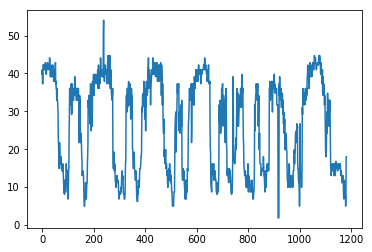

In [4]:
# load the dataset
##bb表表示风速
dataframe = pd.read_excel('speed1.xlsx')
dataset = dataframe.iloc[:,2].values
# 将整型变为float
dataset = dataset.astype('float32')

plt.plot(dataset)
plt.show()


In [5]:
dataset=dataset[:-1]
print(dataset.shape)

(1181,)


In [6]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

# fix random seed for reproducibility
np.random.seed(7)


In [7]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = np.reshape(dataset,newshape=(-1,1))
dataset = scaler.fit_transform(dataset)






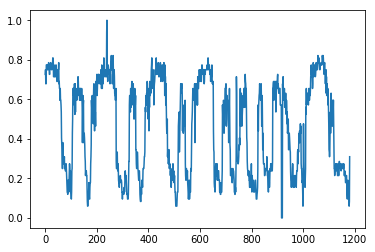

In [8]:
plt.plot(dataset[:])
plt.show()

In [9]:
# split into train and test sets
train_size = int(len(dataset) * 0.9)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]


In [10]:
# use this function to prepare the train and test datasets for modeling
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)


In [11]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
print(trainX.shape)
print(testX.shape)

(1058, 1, 3)
(115, 1, 3)


In [12]:
from keras.callbacks import EarlyStopping,ModelCheckpoint

es = EarlyStopping(monitor='val_acc',patience=5)


In [13]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(512, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=50, batch_size=200,callbacks=[es],verbose=2)



Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/50
 - 3s - loss: 0.2491
Epoch 2/50


D:\Anaconda3\lib\site-packages\keras\callbacks.py:569: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


 - 0s - loss: 0.1458
Epoch 3/50
 - 0s - loss: 0.0688
Epoch 4/50
 - 0s - loss: 0.0246
Epoch 5/50
 - 0s - loss: 0.0134
Epoch 6/50
 - 0s - loss: 0.0176
Epoch 7/50
 - 0s - loss: 0.0168
Epoch 8/50
 - 0s - loss: 0.0127
Epoch 9/50
 - 0s - loss: 0.0113
Epoch 10/50
 - 0s - loss: 0.0113
Epoch 11/50
 - 0s - loss: 0.0108
Epoch 12/50
 - 0s - loss: 0.0102
Epoch 13/50
 - 0s - loss: 0.0098
Epoch 14/50
 - 0s - loss: 0.0095
Epoch 15/50
 - 0s - loss: 0.0092
Epoch 16/50
 - 0s - loss: 0.0089
Epoch 17/50
 - 0s - loss: 0.0086
Epoch 18/50
 - 0s - loss: 0.0084
Epoch 19/50
 - 0s - loss: 0.0082
Epoch 20/50
 - 0s - loss: 0.0079
Epoch 21/50
 - 0s - loss: 0.0078
Epoch 22/50
 - 0s - loss: 0.0076
Epoch 23/50
 - 0s - loss: 0.0075
Epoch 24/50
 - 0s - loss: 0.0073
Epoch 25/50
 - 0s - loss: 0.0072
Epoch 26/50
 - 0s - loss: 0.0071
Epoch 27/50
 - 0s - loss: 0.0070
Epoch 28/50
 - 0s - loss: 0.0070
Epoch 29/50
 - 0s - loss: 0.0069
Epoch 30/50
 - 0s - loss: 0.0068
Epoch 31/50
 - 0s - loss: 0.0068
Epoch 32/50
 - 0s - loss: 0.0

In [14]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [15]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])

testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])


array([41.50439  , 40.98863  , 41.305252 , 41.67588  , 41.96736  ,
       42.27201  , 42.45791  , 42.299004 , 42.113205 , 42.27201  ,
       43.379025 , 43.7827   , 43.42112  , 43.821453 , 43.7827   ,
       43.1152   , 42.407448 , 40.75151  , 41.22572  , 41.688656 ,
       41.54418  , 40.223976 , 38.32872  , 38.252087 , 39.27443  ,
       37.24498  , 37.950657 , 35.399204 , 35.837948 , 35.83712  ,
       35.137268 , 35.4088   , 33.161106 , 33.509945 , 31.764488 ,
       29.378334 , 24.275171 , 21.147076 , 18.947937 , 19.036001 ,
       21.359692 , 25.580202 , 25.656208 , 26.469894 , 29.704895 ,
       29.35649  , 30.676779 , 30.908281 , 31.264654 , 28.807785 ,
       27.851406 , 29.599913 , 29.979715 , 31.672743 , 28.645643 ,
       23.651316 , 18.534935 , 15.982265 , 14.505578 , 14.556651 ,
       14.499578 , 15.033079 , 15.753865 , 16.22058  , 15.927404 ,
       16.147139 , 15.389441 , 15.149963 , 14.758637 , 14.21068  ,
       13.880111 , 14.994932 , 14.999704 , 14.600934 , 13.8801

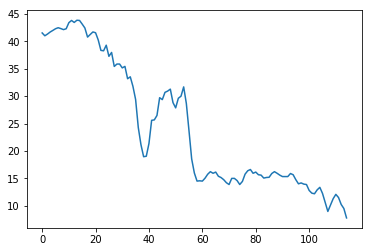

In [16]:
#预测值的结果
testPredict[:,0]
plt.plot(testPredict[:,0])
plt.show()

array([41.00999827, 42.2500007 , 42.2500007 , 42.2500007 , 42.86999881,
       42.86999881, 42.2500007 , 42.2500007 , 42.86999881, 44.74000239,
       44.11999806, 42.86999881, 44.74000239, 44.11999806, 42.2500007 ,
       42.2500007 , 39.76999894, 42.2500007 , 42.86999881, 41.00999827,
       39.15000083, 37.27999725, 39.15000083, 41.00999827, 34.7999986 ,
       39.15000083, 34.18000049, 36.04000104, 37.27999725, 34.18000049,
       36.04000104, 31.68999881, 34.18000049, 31.06999759, 26.71999847,
       19.87999922, 19.25999955, 18.02000023, 19.25999955, 24.22999834,
       29.82999826, 24.22999834, 26.71999847, 34.7999986 , 27.95999779,
       31.06999759, 32.93000125, 31.06999759, 26.10000036, 27.95999779,
       32.93000125, 29.82999826, 32.93000125, 26.10000036, 18.02000023,
       14.90999966, 14.90999966, 13.05000067, 14.28999999, 14.28999999,
       14.90999966, 16.15999968, 16.15999968, 14.90999966, 16.15999968,
       14.28999999, 14.28999999, 14.28999999, 13.05000067, 13.05

<Figure size 2160x1008 with 0 Axes>

([<matplotlib.axis.XTick at 0x1ebd55ab710>,
 <a list of 113 Text xticklabel objects>)

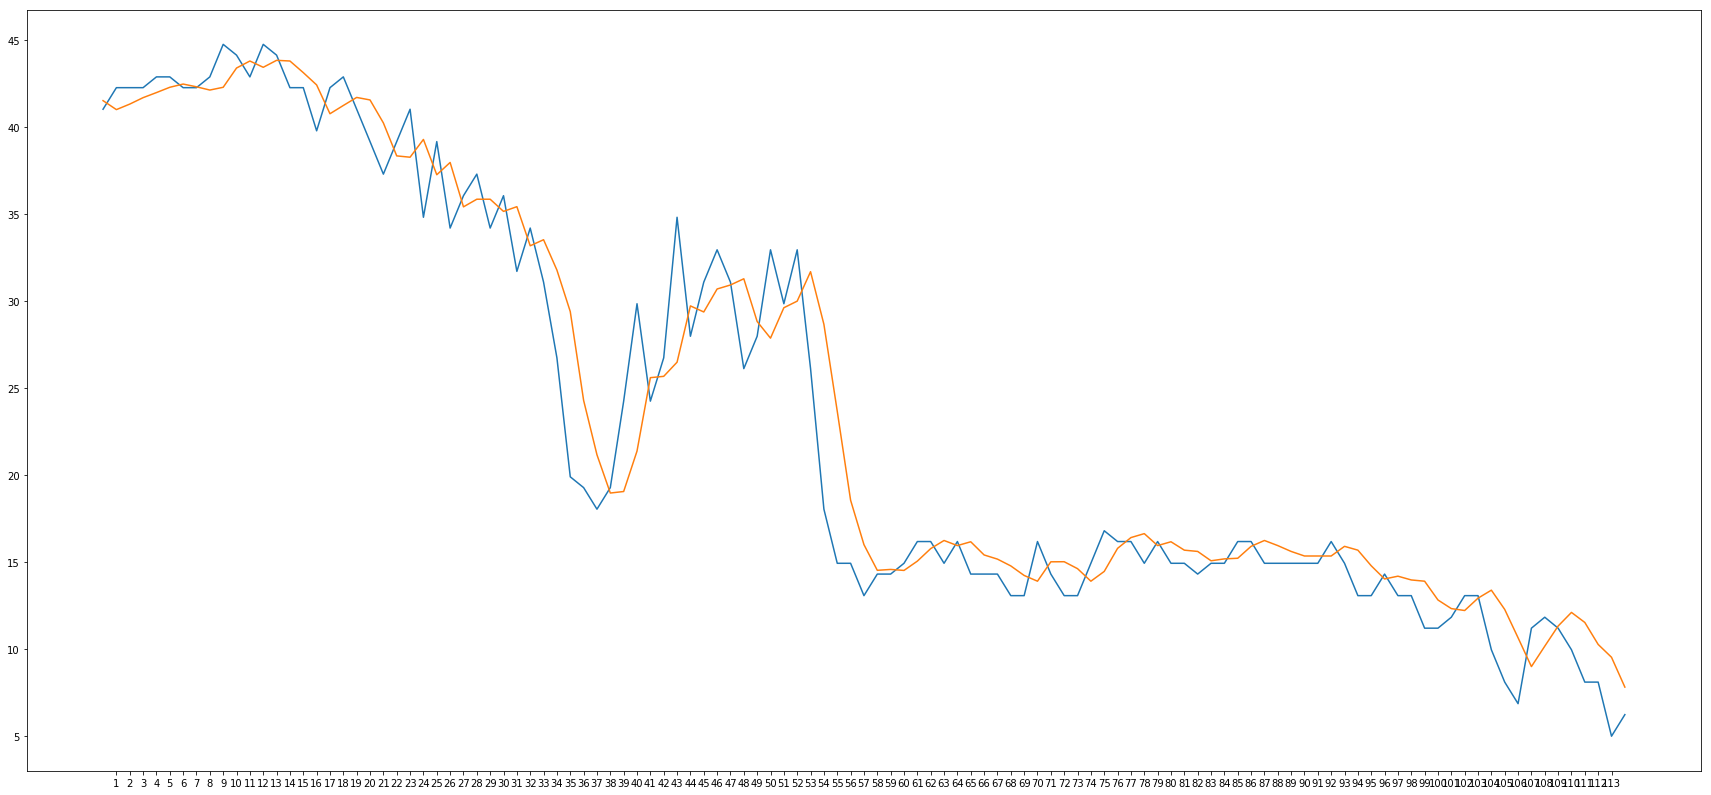

In [17]:
testY[0]
plt.figure(figsize=(30,14))
plt.plot(testY[0])
plt.plot(testPredict[:,0])
plt.xticks(np.arange(1, 114, 1.0))
plt.show()

In [18]:
#trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
#print('Train Score: %.2f MSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f MSE' % (testScore))


Test Score: 2.82 MSE


<Figure size 720x432 with 0 Axes>

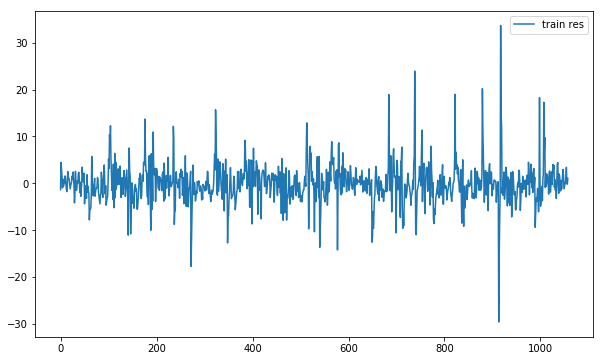

In [19]:
Res_train = []
for i,j in zip(trainY[0], trainPredict[:,0]):
    temp = i-j
    Res_train.append(temp)
Res_train = np.array(Res_train) 
plt.figure(figsize=(10,6))
plt.plot(Res_train,label='train res')
plt.legend(loc='best')
plt.show()

<Figure size 720x432 with 0 Axes>

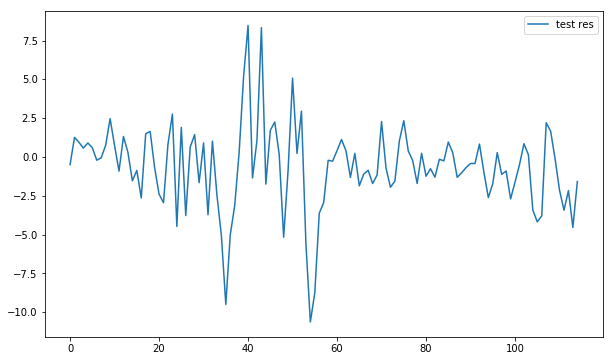

In [20]:
Res_test = []
for i,j in zip(testY[0], testPredict[:,0]):
    temp = i-j
    Res_test.append(temp)
Res_test = np.array(Res_test) 
plt.figure(figsize=(10,6))
plt.plot(Res_test,label='test res')
plt.legend(loc='best')
plt.show()

<Figure size 720x432 with 0 Axes>

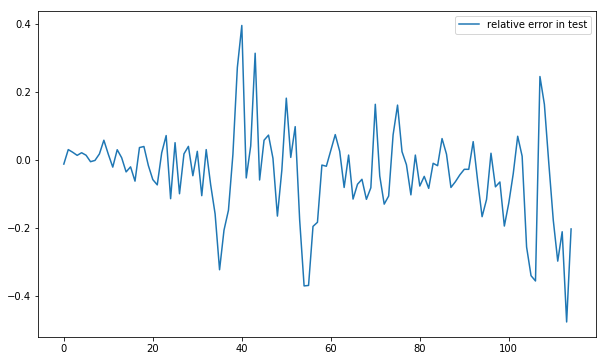

0.09616362517392099


In [21]:
relative_test = []
for i,j in zip(testY[0], testPredict[:,0]):
    temp = (i-j)/j
    relative_test.append(temp)
relative_test = np.array(relative_test) 
plt.figure(figsize=(10,6))
plt.plot(relative_test,label='relative error in test')
plt.legend(loc='best')
plt.show()
print(sum(abs(relative_test))/len(relative_test))

<Figure size 720x432 with 0 Axes>

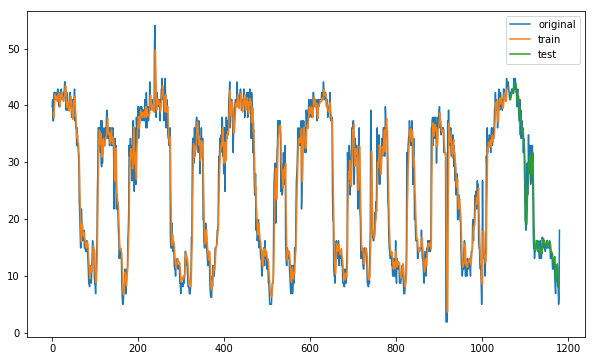

In [22]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.figure(figsize=(10,6))
plt.plot(scaler.inverse_transform(dataset),label='original')
plt.plot(trainPredictPlot,label='train')
plt.plot(testPredictPlot,label='test')
plt.legend(loc='best')
plt.show()


In [23]:
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
print(testPredict.shape)

ss = np.reshape(dataset[-115:],newshape=(-1,1))
print(ss.shape)
mm = np.empty_like(dataset)
mm[:,:] = np.nan
mm[len(trainPredict)+(look_back*2)+1:len(dataset)-1,:] = ss
print(mm.shape)


(115, 1)
(115, 1)
(1181, 1)


<Figure size 1440x720 with 0 Axes>

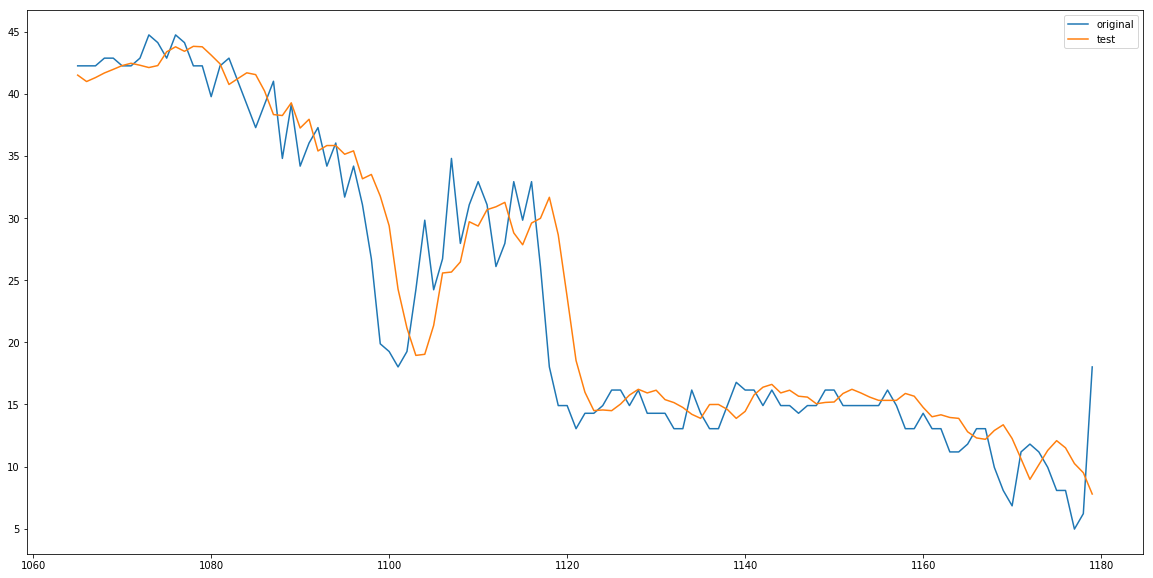

In [24]:
# plot baseline and predictions
plt.figure(figsize=(20,10))
plt.plot(scaler.inverse_transform(mm),label='original')
plt.plot(testPredictPlot,label='test')
plt.legend(loc='best')
plt.show()

In [25]:
x = dataframe.iloc[:,0]
print(x)

0          2
1          3
2          4
3          5
4          6
5          7
6          8
7          9
8         10
9         11
10        12
11        13
12        14
13        15
14        16
15        17
16        18
17        19
18        20
19        21
20        22
21        23
22        24
23        25
24        26
25        27
26        28
27        29
28        30
29        31
        ... 
1152    1154
1153    1155
1154    1156
1155    1157
1156    1158
1157    1159
1158    1160
1159    1161
1160    1162
1161    1163
1162    1164
1163    1165
1164    1166
1165    1167
1166    1168
1167    1169
1168    1170
1169    1171
1170    1172
1171    1173
1172    1174
1173    1175
1174    1176
1175    1177
1176    1178
1177    1179
1178    1180
1179    1181
1180    1182
1181    1183
Name: 1, Length: 1182, dtype: int64
